In [17]:
#Assignment 2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# define values of constants& initial conditions
M = 6.42e23
G = 6.674e-11
min_radius = 3390000
altitude = 1380e3
position = np.array([1, 0, 0]) * (min_radius + altitude)
velocity = np.zeros(3)
t_max = 1000
dt = 0.1
t_array = np.arange(0, t_max, dt)

# function for Euler integration
def euler(s_0, v_0, t_array):
    s = np.array([s_0])
    v = np.array([v_0])

    # define dt
    dt = t_array[1] - t_array[0]

    for t in t_array[1:]:
        r = np.linalg.norm(s_0)
        a = (-G * M / r ** 2) * (s_0 / r)  # s/r is unit vector of position
        s_1 = s_0 + dt * v_0
        v_1 = v_0 + dt * a

        s = np.append(s, [s_1], axis=0)
        v = np.append(v, [v_1], axis=0)

        s_0 = s_1
        v_0 = v_1

        # break the for loop when lander reach the surface
        if r <= min_radius:
            return s, v

    return s, v


def verlet(s_0, v_0, t_array):
    s = np.array([s_0])
    v = np.array([v_0])

    dt = t_array[1] - t_array[0]
    # get second value for s
    s_1 = s_0 + dt * v_0
    s = np.append(s, [s_1], axis=0)

    for t in t_array[2:]:
        r = np.linalg.norm(s_0)
        a = (-G * M / r ** 2) * (s_0 / r)
        s_2 = 2 * s_1 - s_0 + (dt ** 2) * a
        v_1 = (s_2 - s_0) / (2 * dt)
        s = np.append(s, [s_2], axis=0)
        v = np.append(v, [v_1], axis=0)
        s_0 = s_1
        s_1 = s_2

        if r <= min_radius:
            # append velocity array with final velocity
            v_1 = (s_1 - s_0) / dt
            v = np.append(v, [v_1], axis=0)
            return s, v

    # append velocity array with final velocity
    v_1 = (s_1 - s_0) / dt
    v = np.append(v, [v_1], axis=0)
    return s, v


In [19]:
s,v=verlet(position, velocity, t_array)
#altitude calculator
altitudes = []
for i in s:
    alt = np.linalg.norm(i) - min_radius
    if alt >= 0:
        altitudes.append(alt)
    else:
        # as soon as we hit the surface, finish and fill the rest with 0
        altitudes.append(0)
        break

altitudes = np.array(altitudes)
# fill the rest with zeros as we have crashed
altitudes.resize(len(t_array))

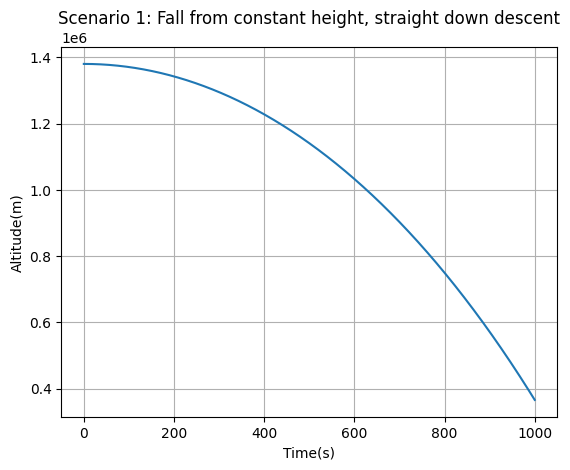

In [20]:
#scenario 1: straight down descent
altitude = 1380e3
position = np.array([1, 0, 0]) * (min_radius + altitude)
velocity = np.zeros(3) #zero initial velocity for scenario 1
t_max = 1000
dt = 0.1
t_array = np.arange(0, t_max, dt)
s,v=verlet(position, velocity, t_array)

#plot altitude as a function of time
plt.figure(1)
plt.xlabel('Time(s)')
plt.ylabel('Altitude(m)')
plt.title("Scenario 1: Fall from constant height, straight down descent")
plt.grid()
plt.plot(t_array, altitudes)
plt.show()

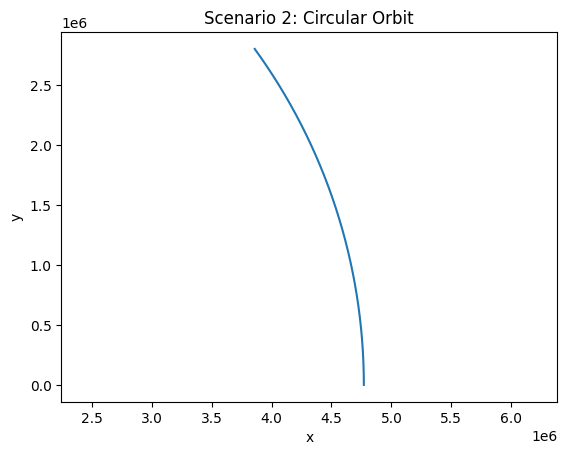

In [21]:
#scenario 2: circular orbit 
# --> velocity is perpendicular to acceleration
position = np.array([1, 0, 0]) * (min_radius + altitude)
#v=GM/r; [0,1,0] is perpendicular to [1,0,0]
velocity = np.array([0, 1, 0]) * (np.sqrt(G*M/np.linalg.norm(position)))
s,v=verlet(position, velocity, t_array)
s = np.transpose(s) #make velocity perpendicular

#plot trajectory in the orbital plane
plt.figure(2)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scenario 2: Circular Orbit")
plt.axis('equal')
plt.plot(s[0],s[1])
plt.show()

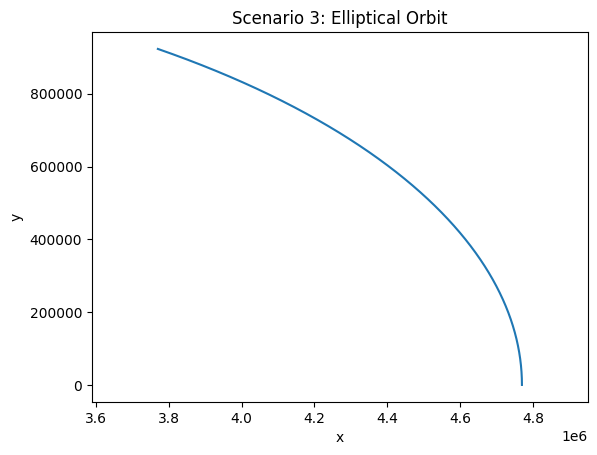

In [22]:
#scenario 3: elliptical orbit
position = np.array([1, 0, 0]) * (min_radius + altitude)
#v=GM/r; [0,1,0] is perpendicular to [1,0,0]
velocity = np.array([0, 1, 0]) * (1000)
s,v=verlet(position, velocity, t_array)
s = np.transpose(s) #make velocity perpendicular

#plot trajectory in the orbital plane
plt.figure(3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scenario 3: Elliptical Orbit")
plt.axis('equal')
plt.plot(s[0],s[1])
plt.show()

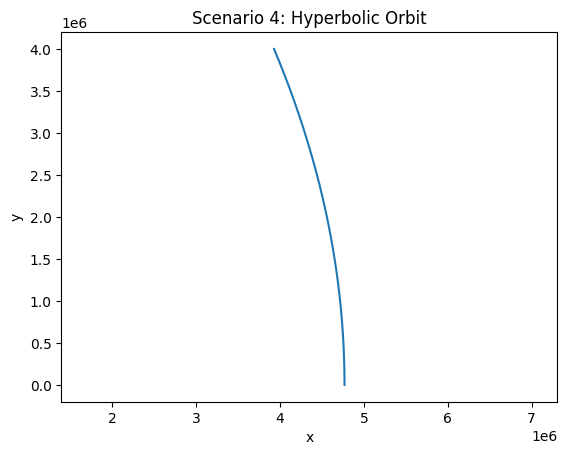

In [23]:
#scenario 4: hyperbolic escape
position = np.array([1, 0, 0]) * (min_radius + altitude)
#find require escape velocity
velocity = np.array([0, 1, 0]) * (np.sqrt(2*G*M/np.linalg.norm(position)))
s,v=verlet(position, velocity, t_array)
s = np.transpose(s) #make velocity perpendicular

#plot trajectory in the orbital plane
plt.figure(4)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scenario 4: Hyperbolic Orbit")
plt.axis('equal')
plt.plot(s[0],s[1])
plt.show()